<a href="https://colab.research.google.com/github/Raajarapu/SAP_COLLEGE_EDUNET_FOUDATION/blob/main/SAP_decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

In [ ]:
df = pd.read_csv("Renewable_Energy_Adoption.csv")
df

,carbon_emissions,energy_output,renewability_index,cost_efficiency,adoption
0,181.089042,128.286267,0.642032,0.732568,1
1,382.750007,672.769370,0.084140,2.891096,0
2,306.197880,382.920383,0.161629,2.932858,0
3,259.530469,557.713622,0.898554,3.368435,0
4,104.606524,916.809827,0.606429,3.767411,0
...,...,...,...,...,...
95,222.828459,414.288617,0.522243,4.688408,0
96,232.956490,753.360111,0.769994,4.362857,0
97,199.639356,907.399234,0.215821,2.430473,0
98,58.896694,898.377782,0.622890,3.878920,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   carbon_emissions    100 non-null    float64
 1   energy_output       100 non-null    float64
 2   renewability_index  100 non-null    float64
 3   cost_efficiency     100 non-null    float64
 4   adoption            100 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 4.0 KB


In [ ]:
df.head(50)

,carbon_emissions,energy_output,renewability_index,cost_efficiency,adoption
0,181.089042,128.286267,0.642032,0.732568,1
1,382.750007,672.769370,0.084140,2.891096,0
2,306.197880,382.920383,0.161629,2.932858,0
3,259.530469,557.713622,0.898554,3.368435,0
4,104.606524,916.809827,0.606429,3.767411,0
5,104.598082,324.363006,0.009197,4.891334,0
6,70.329264,469.344631,0.101472,2.823352,0
7,353.161651,779.996025,0.663502,1.953304,0
8,260.390254,305.918349,0.005062,4.078338,0
9,297.825402,169.281919,0.160808,1.718745,0


In [ ]:
df.isna().sum()

,0
carbon_emissions,0
energy_output,0
renewability_index,0
cost_efficiency,0
adoption,0


In [ ]:
X = df.iloc[ :, :-1]
y = df.iloc[:, -1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
Acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {Acc}")

cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n {cm}")

cr = classification_report(y_test, y_pred)
print(f"Classification Report:\n {cr} ")

Accuracy: 0.9
Confusion Matrix:
 [[16  1]
 [ 1  2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        17
           1       0.67      0.67      0.67         3

    accuracy                           0.90        20
   macro avg       0.80      0.80      0.80        20
weighted avg       0.90      0.90      0.90        20
 


In [ ]:
print(classification_report(y_test, y_pred,target_names=['Non-Adoption', "Adoption"]))

              precision    recall  f1-score   support

Non-Adoption       0.94      0.94      0.94        17
    Adoption       0.67      0.67      0.67         3

    accuracy                           0.90        20
   macro avg       0.80      0.80      0.80        20
weighted avg       0.90      0.90      0.90        20



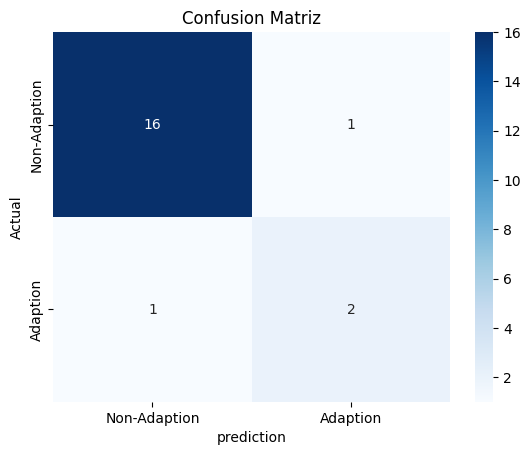

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Adaption', 'Adaption'],
            yticklabels=['Non-Adaption', 'Adaption'])
plt.xlabel("prediction")
plt.ylabel('Actual')
plt.title("Confusion Matriz")
plt.show()

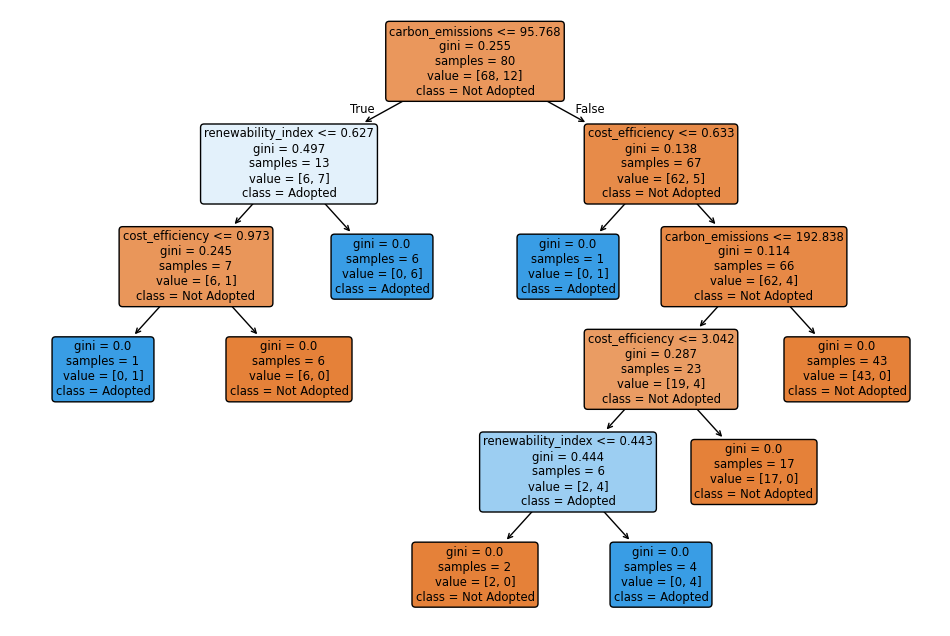

In [ ]:
plt.figure(figsize=(12,8))
plot_tree(model, feature_names=X.columns, class_names=['Not Adopted', 'Adopted'], filled=True, rounded=True)
plt.show()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

In [ ]:
data = pd.read_csv("agricultural sustainability.csv")
data

,soil_health,crop_yield,water_usage,carbon_footprint,fertilizer_use,sustainability
0,0.374540,6778.284815,964.057410,126.020778,226.809659,0
1,0.950714,1757.259685,4561.488080,175.365653,88.134761,0
2,0.731994,2454.658427,2773.635676,129.654718,194.072090,0
3,0.598658,9086.987697,4219.058597,89.916140,201.678762,0
4,0.156019,6457.861537,1940.223205,104.286142,156.032668,0
...,...,...,...,...,...,...
195,0.349210,9376.815930,2632.827381,442.455759,72.895518,0
196,0.725956,8725.714767,3504.009823,469.453227,279.328394,0
197,0.897110,4860.946246,1275.439420,304.309933,84.204658,0
198,0.887086,7757.839610,1365.300585,363.492871,287.559338,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   soil_health       200 non-null    float64
 1   crop_yield        200 non-null    float64
 2   water_usage       200 non-null    float64
 3   carbon_footprint  200 non-null    float64
 4   fertilizer_use    200 non-null    float64
 5   sustainability    200 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 9.5 KB


In [ ]:
X = data.iloc[ : , :-1]
y = data.iloc[ : , -1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
def metrix(y_test, y_pred):
  print("Confusion Matrix:\n" ,confusion_matrix(y_test, y_pred),sep="\n")
  print('Classification Report:\n', classification_report(y_test, y_pred), sep="\n")
  print("Accuracy:", accuracy_score(y_test, y_pred))
metrix(y_test, y_pred)



Confusion Matrix:

[[35  0]
 [ 2  3]]
Classification Report:

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        35
           1       1.00      0.60      0.75         5

    accuracy                           0.95        40
   macro avg       0.97      0.80      0.86        40
weighted avg       0.95      0.95      0.94        40

Accuracy: 0.95


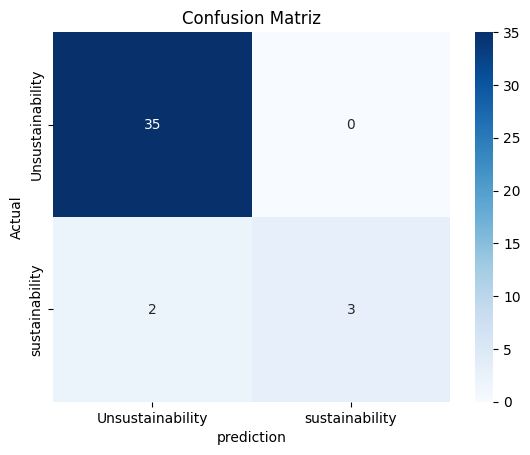

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Unsustainability', 'sustainability'],
            yticklabels=['Unsustainability', 'sustainability'])
plt.xlabel("prediction")
plt.ylabel('Actual')
plt.title("Confusion Matriz")
plt.show()

# SVM


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import  accuracy_score, classification_report, confusion_matrix

In [ ]:
df = pd.read_csv("waste management.csv")
df.head()

,waste_type,material_composition,recycling_potential,toxicity_level,management_strategy
0,3,0.198716,0.016588,81.011339,0
1,1,0.005522,0.512093,86.707232,0
2,3,0.815461,0.226496,91.324055,0
3,3,0.706857,0.645173,51.134240,0
4,1,0.729007,0.174366,50.151629,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   waste_type            100 non-null    int64  
 1   material_composition  100 non-null    float64
 2   recycling_potential   100 non-null    float64
 3   toxicity_level        100 non-null    float64
 4   management_strategy   100 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 4.0 KB


In [ ]:
print(df['management_strategy'].value_counts())

management_strategy
0    87
1    13
Name: count, dtype: int64


In [ ]:
X = df.iloc[ : , :-1]
y = df.iloc[ : , -1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [ ]:
model = SVC(kernel='rbf', C=1.0, gamma='scale')
model.fit(X_train, y_train)

SVC()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
print("Confusion Matrix:\n" ,confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[18  0]
 [ 2  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95        18
           1       0.00      0.00      0.00         2

    accuracy                           0.90        20
   macro avg       0.45      0.50      0.47        20
weighted avg       0.81      0.90      0.85        20

Accuracy: 0.9


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


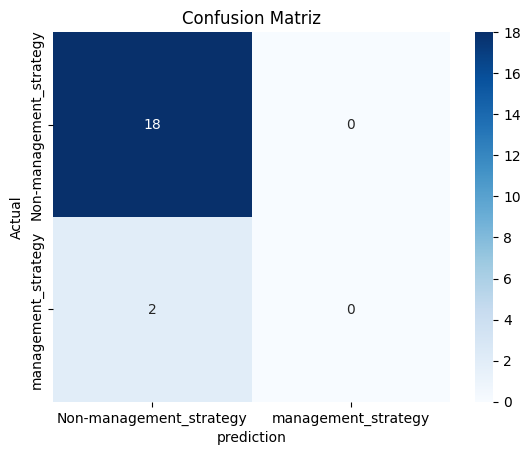

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-management_strategy', 'management_strategy'],
            yticklabels=['Non-management_strategy', 'management_strategy'])
plt.xlabel("prediction")
plt.ylabel('Actual')
plt.title("Confusion Matriz")
plt.show()

# K-Means

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
X = df.iloc[ : , :-1]
y = df.iloc[ : , -1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

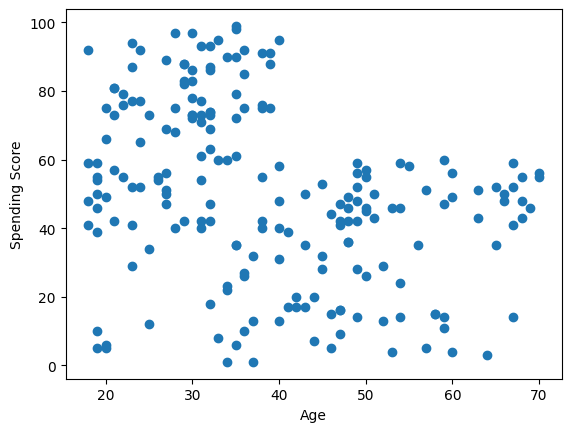

In [ ]:
plt.scatter(df['Age'],df['Spending Score (1-100)'])

plt.xlabel("Age")

plt.ylabel("Spending Score")

plt.show()

Text(0, 0.5, 'Annual Income (k$)')

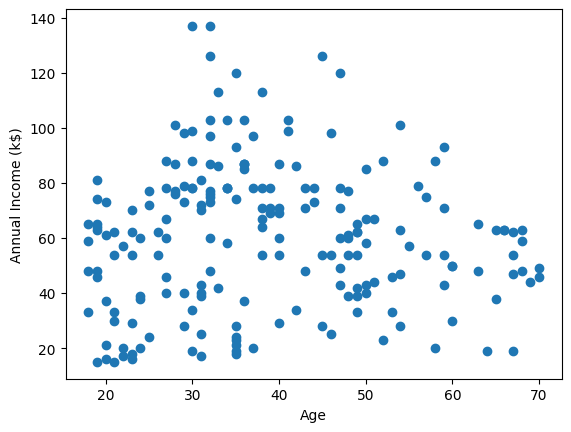

In [ ]:
plt.scatter(df["Age"],df["Annual Income (k$)"])

plt.xlabel("Age")

plt.ylabel("Annual Income (k$)")

Text(0, 0.5, 'Annual Income (k$)')

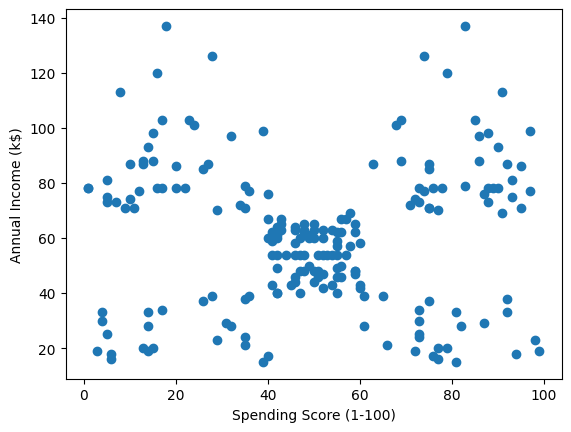

In [ ]:
plt.scatter(df["Spending Score (1-100)"], df["Annual Income (k$)"])

plt.xlabel("Spending Score (1-100)")

plt.ylabel("Annual Income (k$)")

In [ ]:
relevant_cols = ["Age", "Annual Income (k$)",

         "Spending Score (1-100)"]

In [ ]:
customer_df = df[relevant_cols]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [ ]:
scaler.fit(customer_df)

StandardScaler()

In [ ]:
scaled_data = scaler.transform(customer_df)

In [ ]:
def find_best_clusters(df, maximum_K):

  clusters_centers = []

  k_values = []

  for k in range(2, maximum_K):

    kmeans_model = KMeans(n_clusters = k)

    kmeans_model.fit(df)



    clusters_centers.append(kmeans_model.inertia_)

    k_values.append(k)



  return clusters_centers, k_values

In [ ]:
clusters_centers, k_values = find_best_clusters(scaled_data, 12)

In [ ]:
def generate_elbow_plot(clusters_centers, k_values):



  figure = plt.subplots(figsize = (12, 6))

  plt.plot(k_values, clusters_centers, 'o-', color = 'orange')

  plt.xlabel("Number of Clusters (K)")

  plt.ylabel("Cluster Inertia")

  plt.title("Elbow Plot of KMeans")

  plt.show()

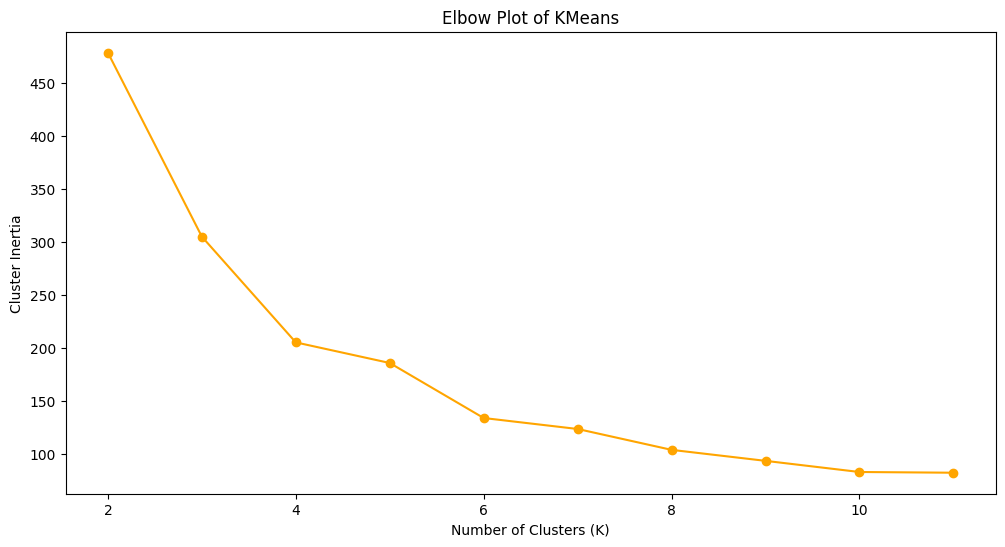

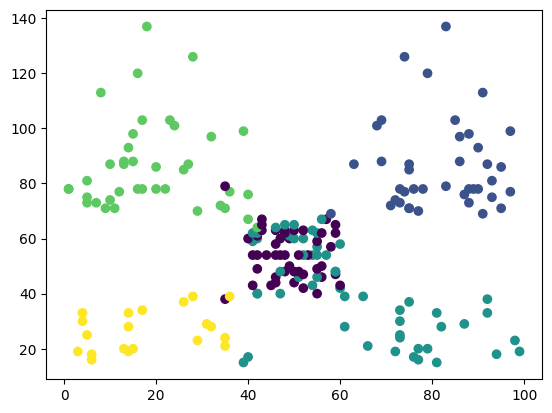

In [ ]:
generate_elbow_plot(clusters_centers, k_values)





kmeans_model = KMeans(n_clusters = 5)



kmeans_model.fit(scaled_data)





df["clusters"] = kmeans_model.labels_



df





plt.scatter(df["Spending Score (1-100)"],

      df["Annual Income (k$)"],

      c = df["clusters"]

      )

# Hiararical Clustering


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [ ]:
df.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
180,181,Female,37,97,32
52,53,Female,31,43,54
6,7,Female,35,18,6
190,191,Female,34,103,23
196,197,Female,45,126,28


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.shape

(200, 5)

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
195,False
196,False
197,False
198,False


In [ ]:
X = df.iloc[ : , 3:5].values

In [ ]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

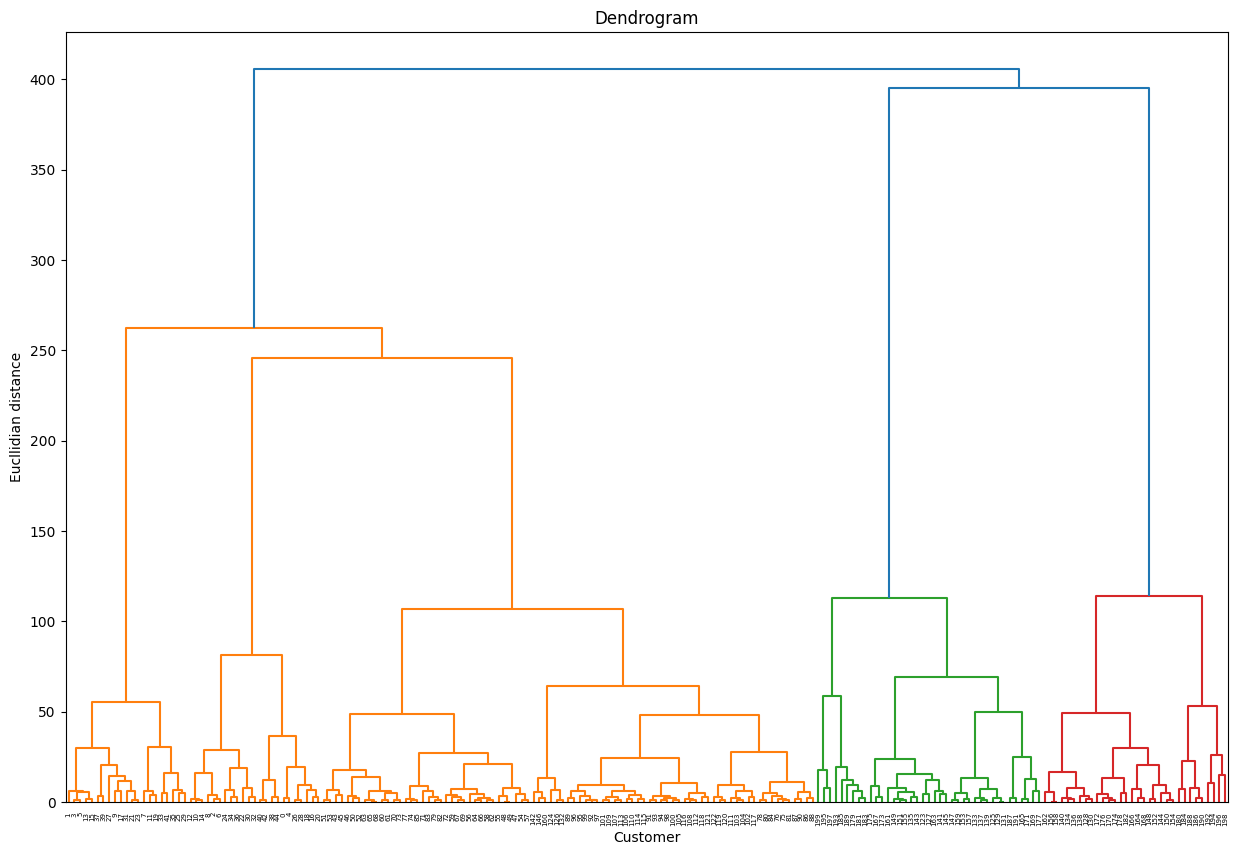

In [ ]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title("Dendrogram")
plt.xlabel("Customer")
plt.ylabel("Eucllidian distance")
plt.show()

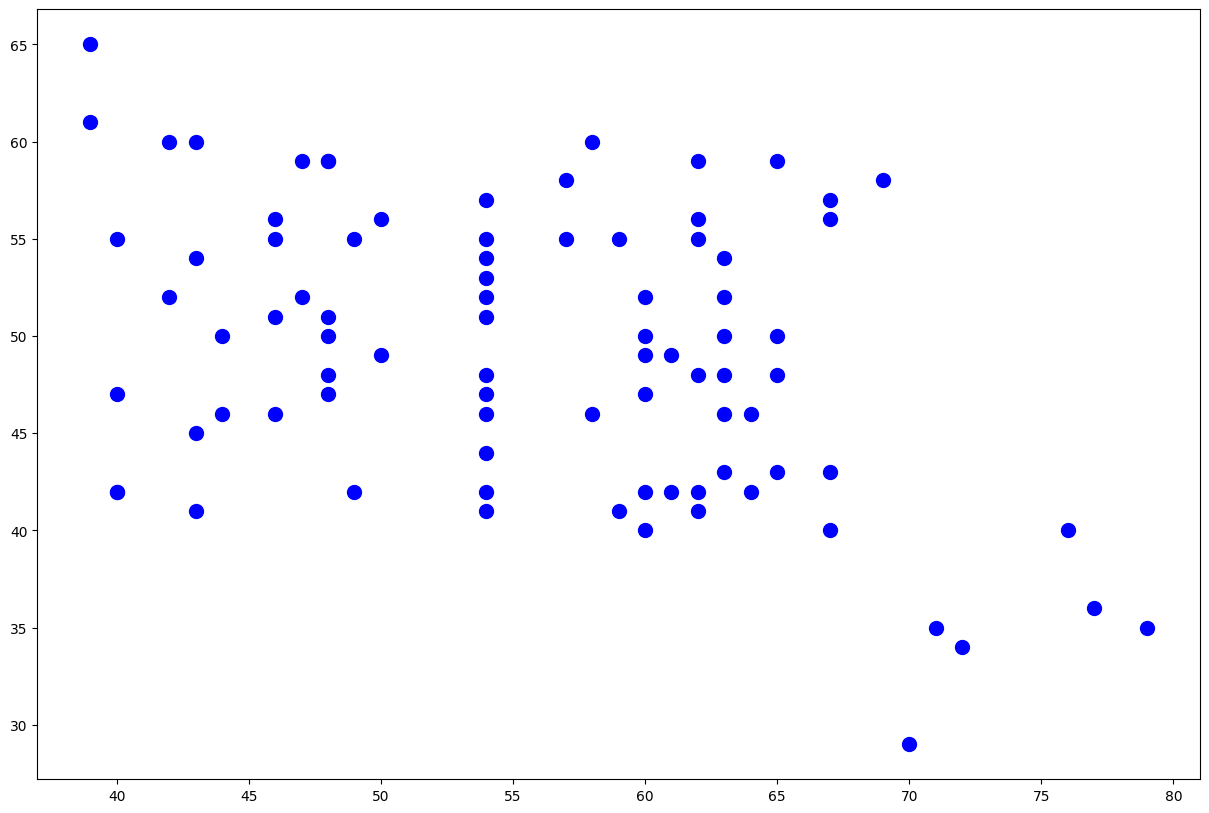

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s =100, c = 'red', label = 'Careful')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s =100, c = 'blue', label = 'Standard')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s =100, c = 'green', label = 'Target')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s =100, c = 'cyan', label = 'Careless')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s =100, c = 'magenta', label = 'Sensible')
plt.title("Cluster of Customer")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

# DEEP LEARNING

## CNN ALgo


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/CarPrice_dataset.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
df.sample(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
34,35,1,honda civic cvcc,gas,std,two,hatchback,fwd,front,93.7,...,92,1bbl,2.91,3.41,9.20,76,6000,30,34,7129.0
121,122,1,plymouth satellite custom (sw),gas,std,four,sedan,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.40,68,5500,31,38,6692.0
79,80,1,mitsubishi g4,gas,turbo,two,hatchback,fwd,front,93.0,...,98,spdi,3.03,3.39,7.60,102,5500,24,30,7689.0
132,133,3,saab 99e,gas,std,two,hatchback,fwd,front,99.1,...,121,mpfi,3.54,3.07,9.31,110,5250,21,28,11850.0
13,14,0,bmw x3,gas,std,four,sedan,rwd,front,101.2,...,164,mpfi,3.31,3.19,9.00,121,4250,21,28,21105.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
# Separate features and target

X = df.drop(columns=['price'])

y = df['price']

# Identify categorical and numerical columns

categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()



# Define preprocessing steps

preprocessor = ColumnTransformer(

  transformers=[

    ('num', StandardScaler(), numerical_cols),

    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)

  ])

# Apply preprocessing

X_processed = preprocessor.fit_transform(X)

# Split the data

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense



# Define the model

model = Sequential([

  Dense(512, activation='relu', input_shape=(X_train.shape[1],)),

  Dense(256, activation='relu'),

  Dense(128, activation='relu'),

  Dense(64, activation='relu'),

  Dense(32, activation='relu'),

  Dense(1)

])



# Compile the model

model.compile(optimizer='adam', loss='mean_absolute_error',

       metrics = ["mean_absolute_error", "mean_squared_error"])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       102,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 277,505 (1.06 MB)

 Trainable params: 277,505 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

# CNN HandsON- RNN

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


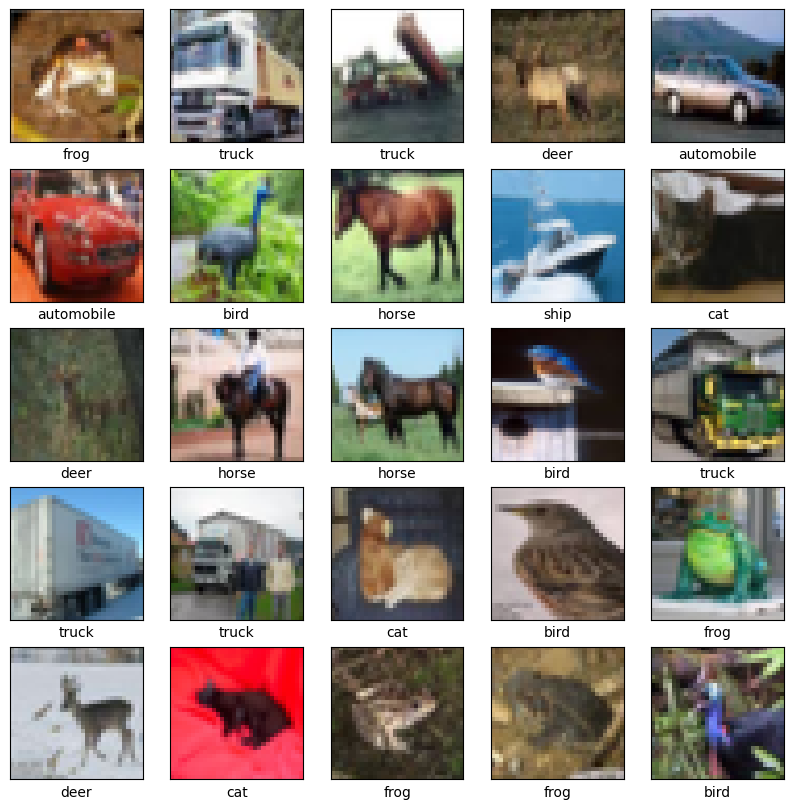

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i]) # The CIFAR labels happen to be arrays, # which is why you need the extra index
  plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))


In [ ]:
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.3372 - loss: 1.7834 - val_accuracy: 0.5272 - val_loss: 1.3255
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5593 - loss: 1.2376 - val_accuracy: 0.5983 - val_loss: 1.1393
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6199 - loss: 1.0856 - val_accuracy: 0.6254 - val_loss: 1.0595
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6543 - loss: 0.9814 - val_accuracy: 0.6468 - val_loss: 1.0050
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6860 - loss: 0.8966 - val_accuracy: 0.6726 - val_loss: 0.9287
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7056 - loss: 0.8402 - val_accuracy: 0.6832 - val_loss: 0.9046
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7291 - loss: 0.7760 - val_accuracy: 0.6971 - val_loss: 0.8743
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7437 - loss: 0.7386 -

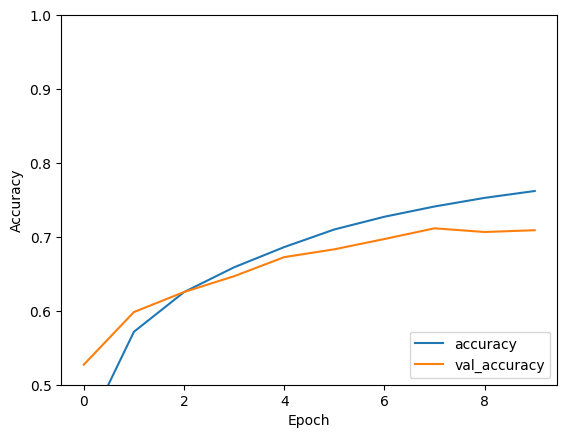

313/313 - 1s - 2ms/step - accuracy: 0.7090 - loss: 0.8518
Test Accuracy: 0.7089999914169312


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test Accuracy: {test_acc}")